
#  Introduction
This notebook provides a comprehensive exploration of the most upvoted and downloaded datasets on Kaggle, the world's largest platform for data science competitions and collaboration. By analyzing the top 100 datasets from the Kaggle community, this project uncovers trends in dataset popularity, author influence, and user behavior over time.

The dataset includes a variety of metadata fields such as:

Number of upvotes, downloads, views, and comments

Dataset creation date

Associated file types

Author profiles and ranks

Through a series of data cleaning steps, visualizations, and statistical summaries, this notebook answers key questions such as:

🧠 What makes a dataset popular on Kaggle?

📈 How has dataset activity evolved over the years?

👥 Who are the most impactful dataset contributors?

🧩 Which features are correlated with visibility and engagement?

By the end of this analysis, you'll gain valuable insights into the anatomy of a successful dataset, useful not only for understanding platform dynamics but also for improving your own dataset publishing strategy.



#   Data Loading and Cleaning

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/kaggles-most-upvoted-datasets-overview/kaggle_top_100_dataset.csv', encoding='latin1', sep=';')

# Display basic information
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (99, 9)


,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,Bitcoin Historical Data,Zielak,2025,100,1,CSV,98 MB,3693,Gold
1,International football results from 1872 to 2025,Mart Jürisoo,2025,100,4,CSV,1 MB,2315,Gold
2,Fruits-360 dataset,Mihai Oltean,2025,88,240356,other,4 GB,3133,Gold
3,Formula 1 World Championship (1950 - 2024),Vopani,2025,100,14,CSV,7 MB,1937,Gold
4,arXiv Dataset,Cornell University,2025,88,1,JSON,2 GB,1480,Bronze


In [3]:
# Check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dataset_Name  99 non-null     object
 1   Author        99 non-null     object
 2   Last_Update   99 non-null     int64 
 3   Usability     99 non-null     int64 
 4   File_Count    99 non-null     int64 
 5   Data_Type     99 non-null     object
 6   Size          99 non-null     object
 7   Upvote        99 non-null     int64 
 8   Rank          99 non-null     object
dtypes: int64(4), object(5)
memory usage: 7.1+ KB


Dataset_Name    0
Author          0
Last_Update     0
Usability       0
File_Count      0
Data_Type       0
Size            0
Upvote          0
Rank            0
dtype: int64

In [4]:
# Data preprocessing: Convert Last_Update to datetime and extract year
df['Year'] = pd.to_numeric(df['Last_Update'], errors='coerce')

# Create a copy of the dataframe for analysis
df_analysis = df.copy()

# Convert upvote to numeric (remove commas if present)
df_analysis['Upvote'] = pd.to_numeric(df_analysis['Upvote'], errors='coerce')

# Convert Size to a standardized format (all in MB for easier comparison)
def standardize_size(size_str):
    try:
        value, unit = size_str.split()
        value = float(value)
        if unit == 'KB':
            return value / 1024
        elif unit == 'GB':
            return value * 1024
        else:  # MB
            return value
    except:
        return np.nan

df_analysis['Size_MB'] = df_analysis['Size'].apply(standardize_size)

# Display the processed data
df_analysis.head()

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank,Year,Size_MB
0,Bitcoin Historical Data,Zielak,2025,100,1,CSV,98 MB,3693,Gold,2025,98.0
1,International football results from 1872 to 2025,Mart Jürisoo,2025,100,4,CSV,1 MB,2315,Gold,2025,1.0
2,Fruits-360 dataset,Mihai Oltean,2025,88,240356,other,4 GB,3133,Gold,2025,4096.0
3,Formula 1 World Championship (1950 - 2024),Vopani,2025,100,14,CSV,7 MB,1937,Gold,2025,7.0
4,arXiv Dataset,Cornell University,2025,88,1,JSON,2 GB,1480,Bronze,2025,2048.0


In [5]:
# Basic statistics of the dataset
df_analysis.describe()

# Count datasets by year
year_counts = df_analysis['Year'].value_counts().sort_index()
print("\nDatasets by year:")
print(year_counts)

# Count datasets by data type
data_type_counts = df_analysis['Data_Type'].value_counts()
print("\nDatasets by data type:")
print(data_type_counts)



Datasets by year:
Year
2016     8
2017    13
2018    19
2019    11
2020     8
2021    13
2022    18
2023     3
2024     1
2025     5
Name: count, dtype: int64

Datasets by data type:
Data_Type
CSV            60
other          22
CSV, other      6
JSON            2
CSV,  other     2
SV, other       2
SQLITE, CSV     2
CSV, JSON       1
other, CSV      1
SQLITE          1
Name: count, dtype: int64


# General Activity Growth Analysis

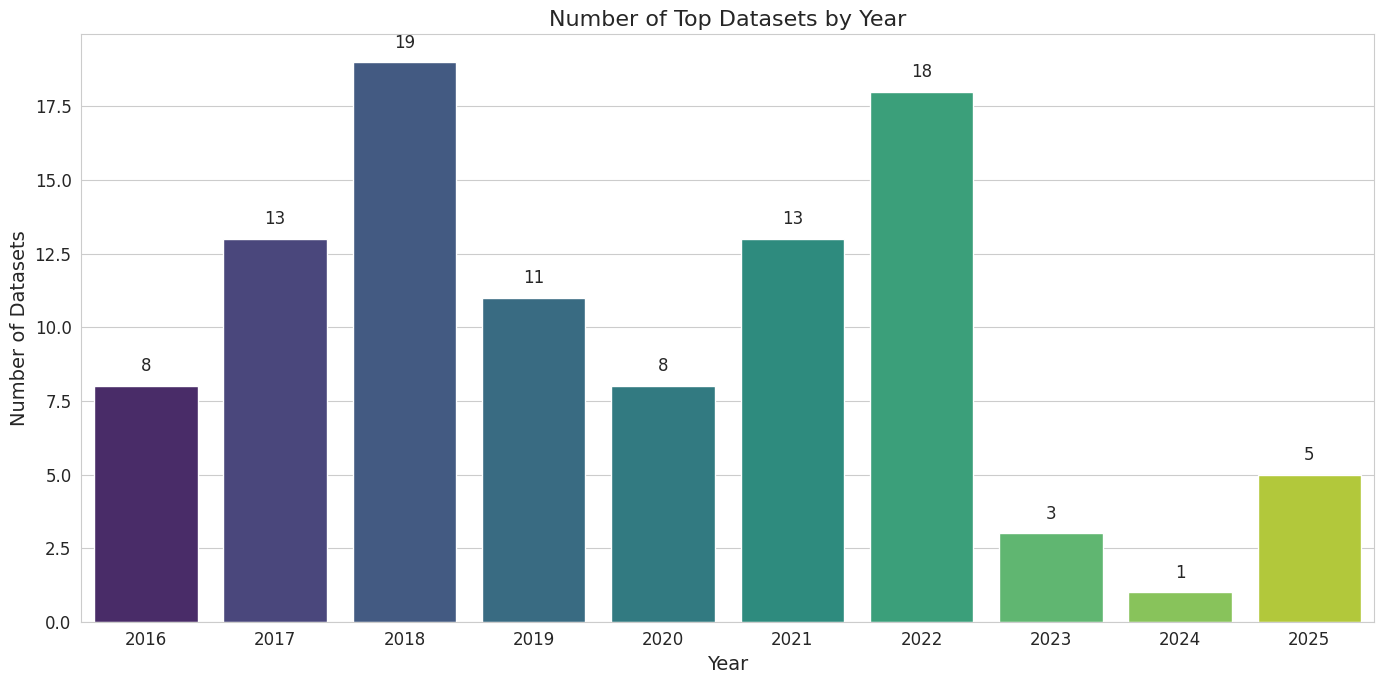

In [6]:
# Analyze the growth in number of datasets over the years
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Top Datasets by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Datasets', fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(year_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

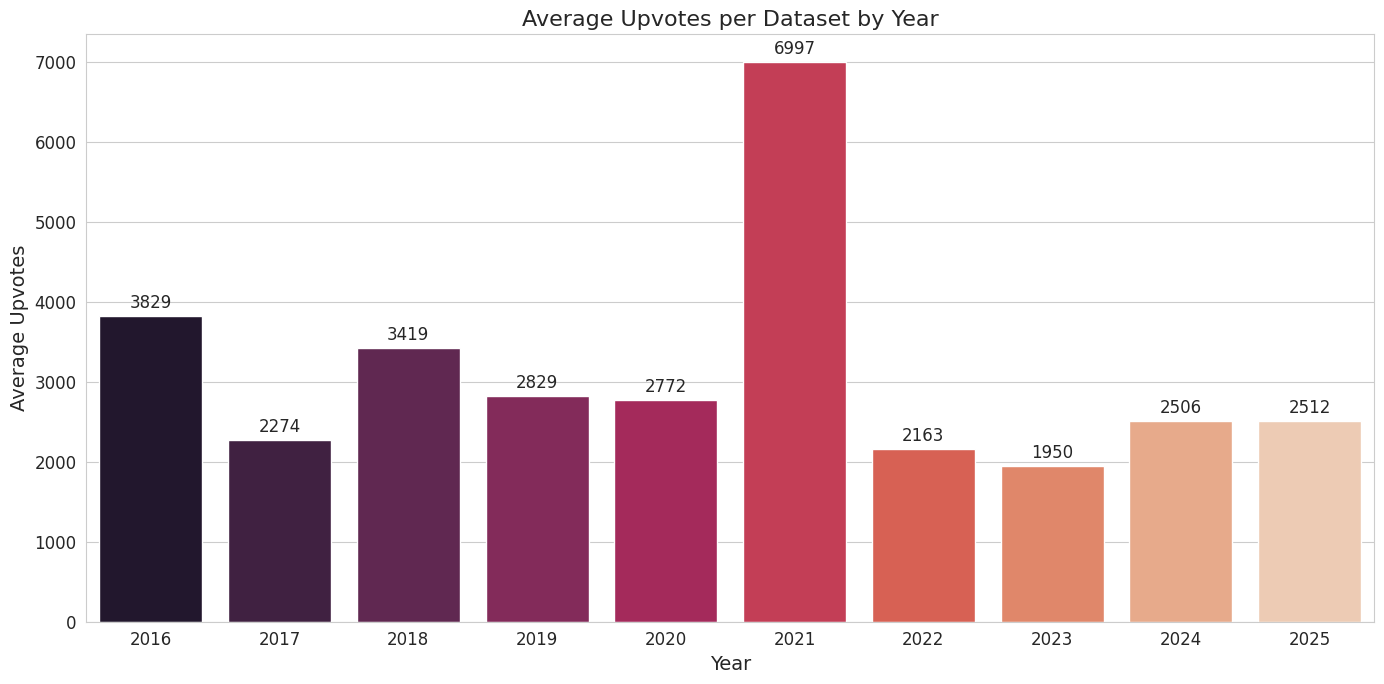

In [7]:
# Average upvotes per dataset by year
yearly_avg_upvotes = df_analysis.groupby('Year')['Upvote'].mean().round()

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=yearly_avg_upvotes.index, y=yearly_avg_upvotes.values, palette='rocket')
plt.title('Average Upvotes per Dataset by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Upvotes', fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(yearly_avg_upvotes.values):
    ax.text(i, v + 100, f"{v:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# User Behavior Analysis

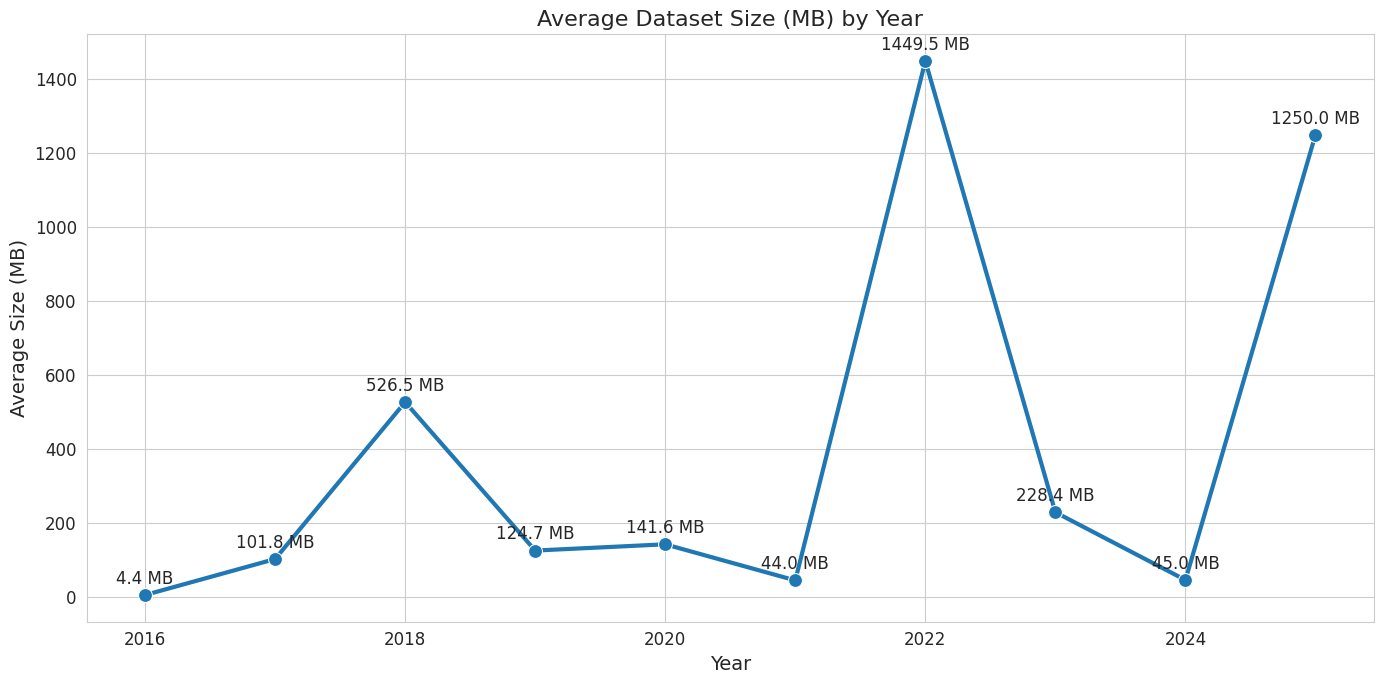

In [8]:
# Average file size trend by year
yearly_avg_size = df_analysis.groupby('Year')['Size_MB'].mean()

plt.figure(figsize=(14, 7))
ax = sns.lineplot(x=yearly_avg_size.index, y=yearly_avg_size.values, marker='o', linewidth=3, markersize=10)
plt.title('Average Dataset Size (MB) by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Size (MB)', fontsize=14)

# Add value labels for each point
for i, v in enumerate(yearly_avg_size.values):
    ax.text(yearly_avg_size.index[i], v + 30, f"{v:.1f} MB", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Data Type Popularity Analysis


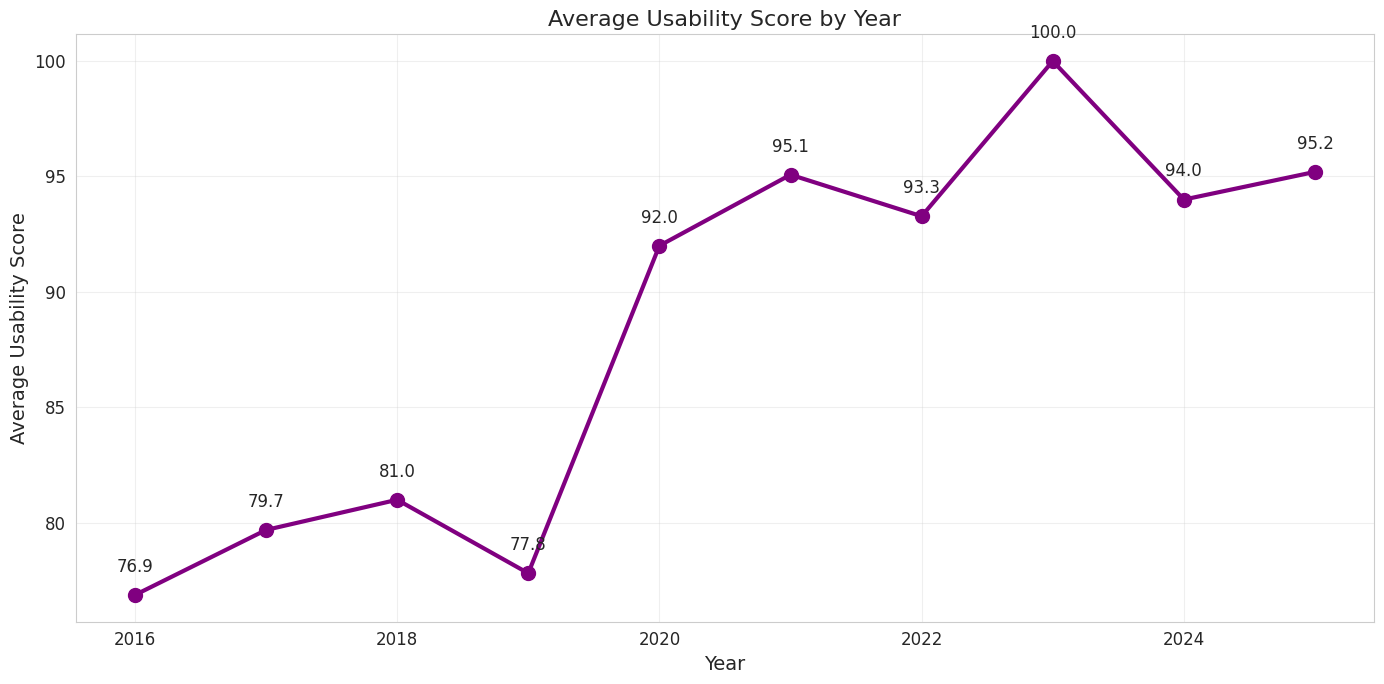

In [9]:
# Analyze usability scores over the years
yearly_avg_usability = df_analysis.groupby('Year')['Usability'].mean()

plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_usability.index, yearly_avg_usability.values, marker='o', linewidth=3, markersize=10, color='purple')
plt.title('Average Usability Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Usability Score', fontsize=14)
plt.grid(True, alpha=0.3)

# Add value labels for each point
for i, v in enumerate(yearly_avg_usability.values):
    plt.text(yearly_avg_usability.index[i], v + 1, f"{v:.1f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

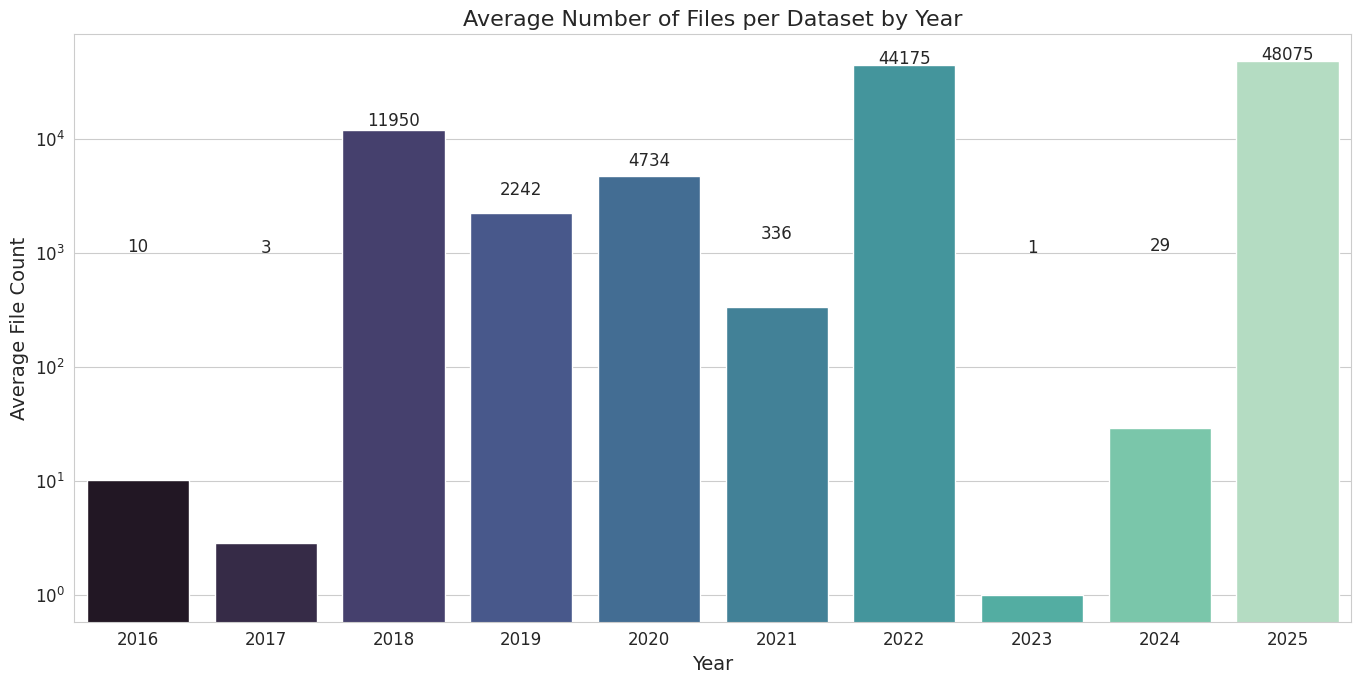

In [10]:
# Number of files per dataset by year
yearly_avg_files = df_analysis.groupby('Year')['File_Count'].mean()

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=yearly_avg_files.index, y=yearly_avg_files.values, palette='mako')
plt.title('Average Number of Files per Dataset by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average File Count', fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(yearly_avg_files.values):
    ax.text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.yscale('log')  # Log scale to better visualize the differences
plt.show()

<Figure size 1400x800 with 0 Axes>

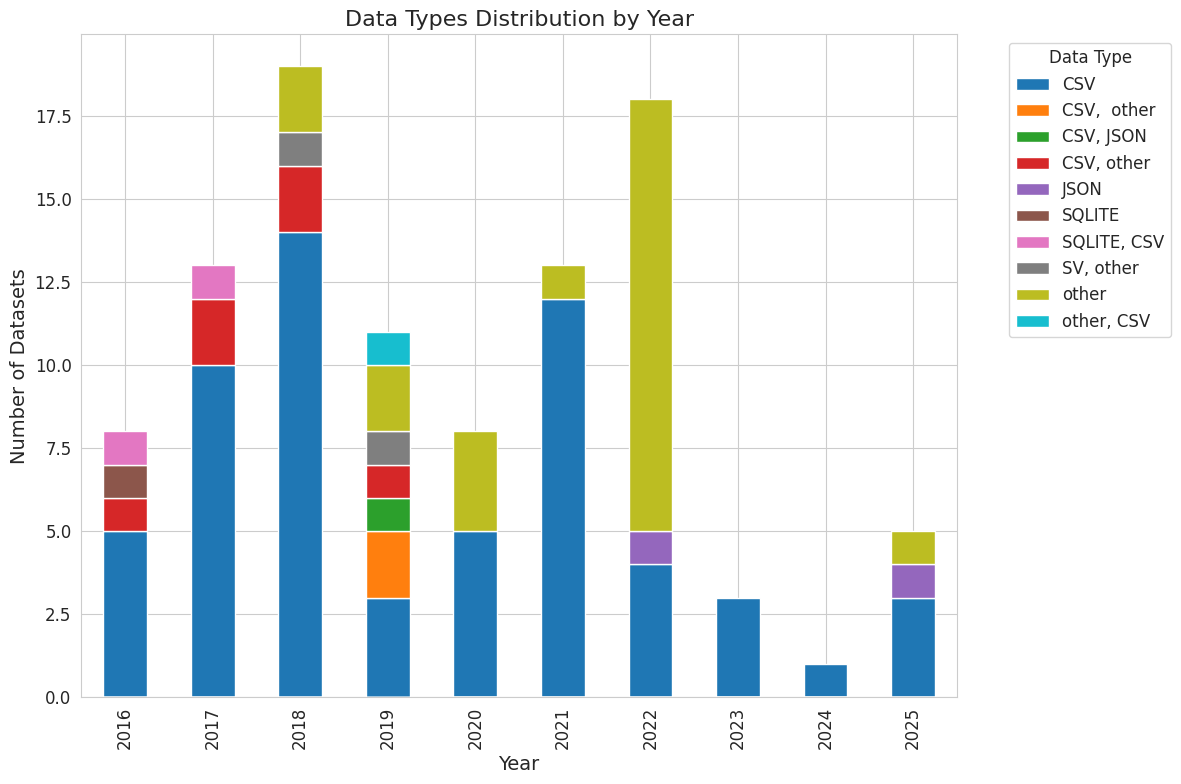

In [11]:
# Create a pivot table for data types by year
data_type_year = pd.crosstab(df_analysis['Year'], df_analysis['Data_Type'])

# Prepare data for a stacked bar chart
data_types_stacked = data_type_year.stack().reset_index()
data_types_stacked.columns = ['Year', 'Data_Type', 'Count']

# Plot data types by year (stacked)
plt.figure(figsize=(14, 8))
data_pivot = data_types_stacked.pivot(index='Year', columns='Data_Type', values='Count')
data_pivot.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Data Types Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Datasets', fontsize=14)
plt.legend(title='Data Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

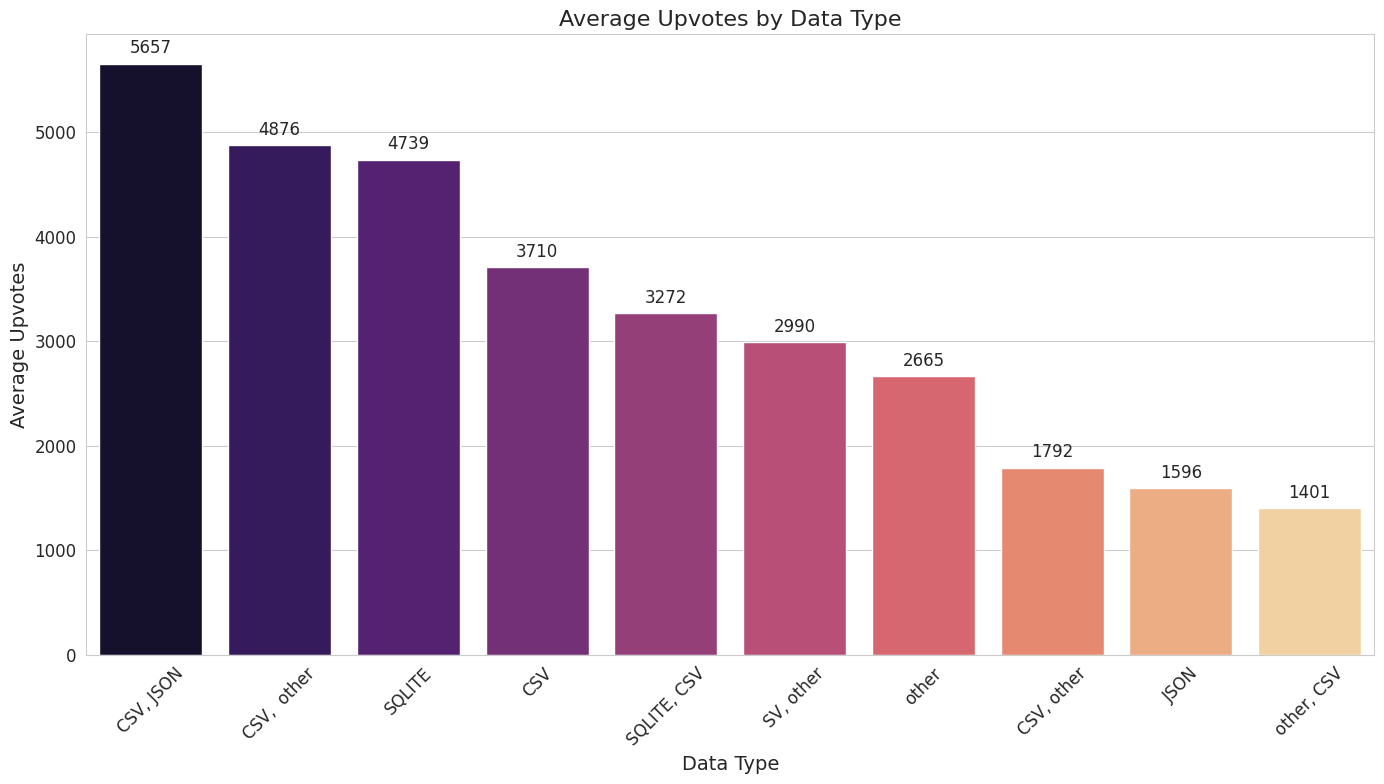

In [12]:
# Average upvotes by data type
avg_upvotes_by_type = df_analysis.groupby('Data_Type')['Upvote'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=avg_upvotes_by_type.index, y=avg_upvotes_by_type.values, palette='magma')
plt.title('Average Upvotes by Data Type', fontsize=16)
plt.xlabel('Data Type', fontsize=14)
plt.ylabel('Average Upvotes', fontsize=14)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(avg_upvotes_by_type.values):
    ax.text(i, v + 100, f"{v:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

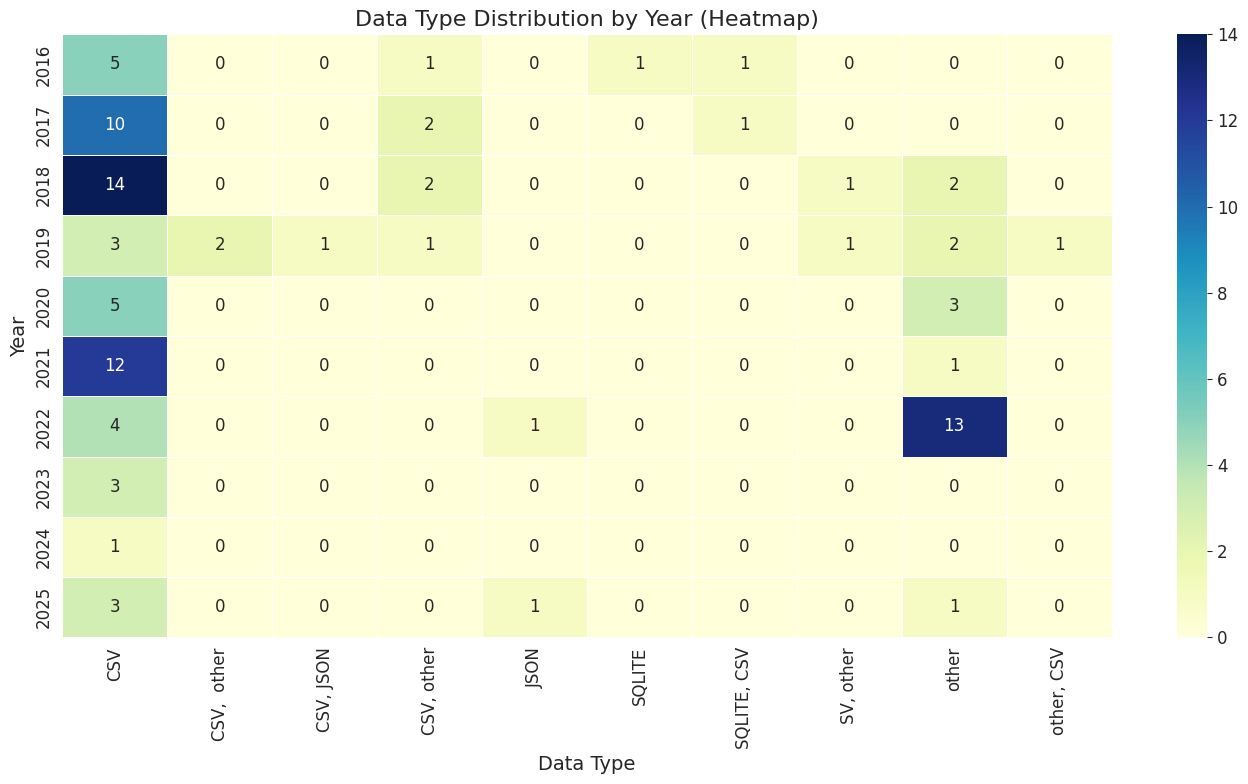

In [13]:
# Evolution of data types over the years - heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data_type_year, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('Data Type Distribution by Year (Heatmap)', fontsize=16)
plt.xlabel('Data Type', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.tight_layout()
plt.show()

# Rank and Popularity Trends

<Figure size 1400x800 with 0 Axes>

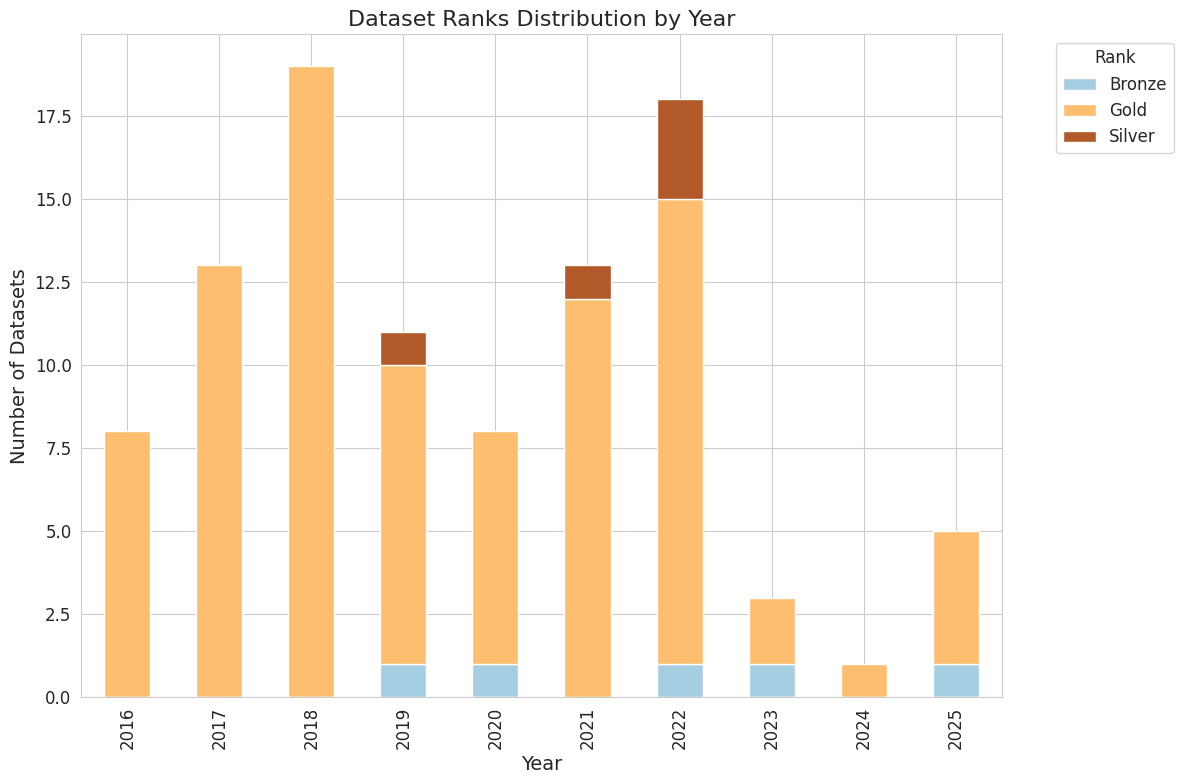

In [14]:
# Analysis of Gold, Silver, Bronze ranks over the years
rank_year = pd.crosstab(df_analysis['Year'], df_analysis['Rank'])

plt.figure(figsize=(14, 8))
rank_year.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Dataset Ranks Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Datasets', fontsize=14)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

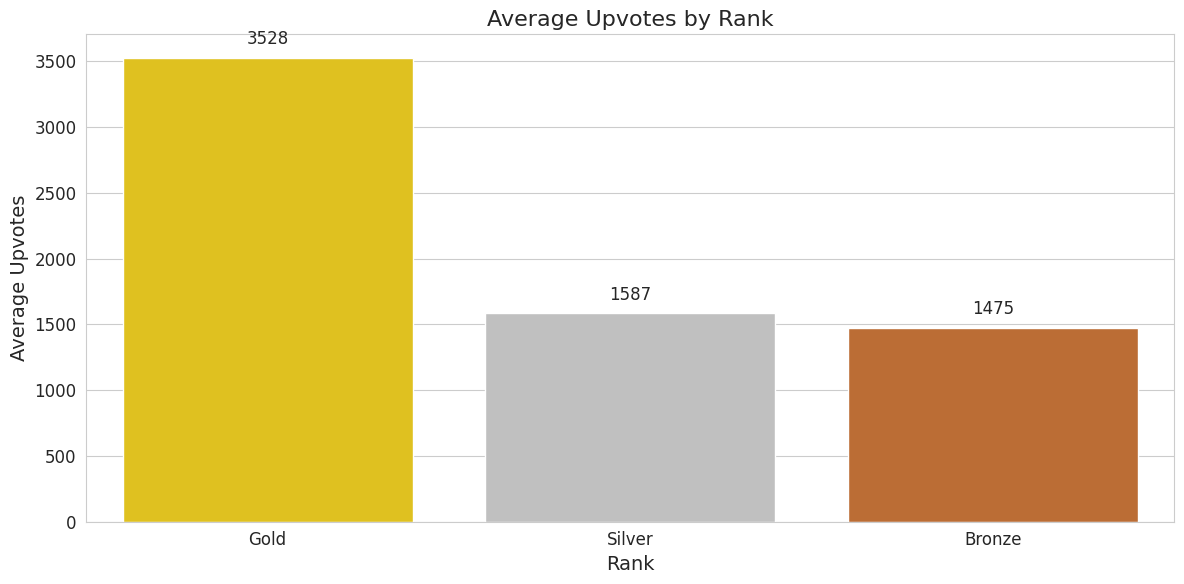

In [15]:
# Average upvotes by rank
avg_upvotes_by_rank = df_analysis.groupby('Rank')['Upvote'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'chocolate'}
ax = sns.barplot(x=avg_upvotes_by_rank.index, y=avg_upvotes_by_rank.values, palette=[colors.get(x, 'gray') for x in avg_upvotes_by_rank.index])
plt.title('Average Upvotes by Rank', fontsize=16)
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Average Upvotes', fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(avg_upvotes_by_rank.values):
    ax.text(i, v + 100, f"{v:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Author Analysis and Most Popular Contributors

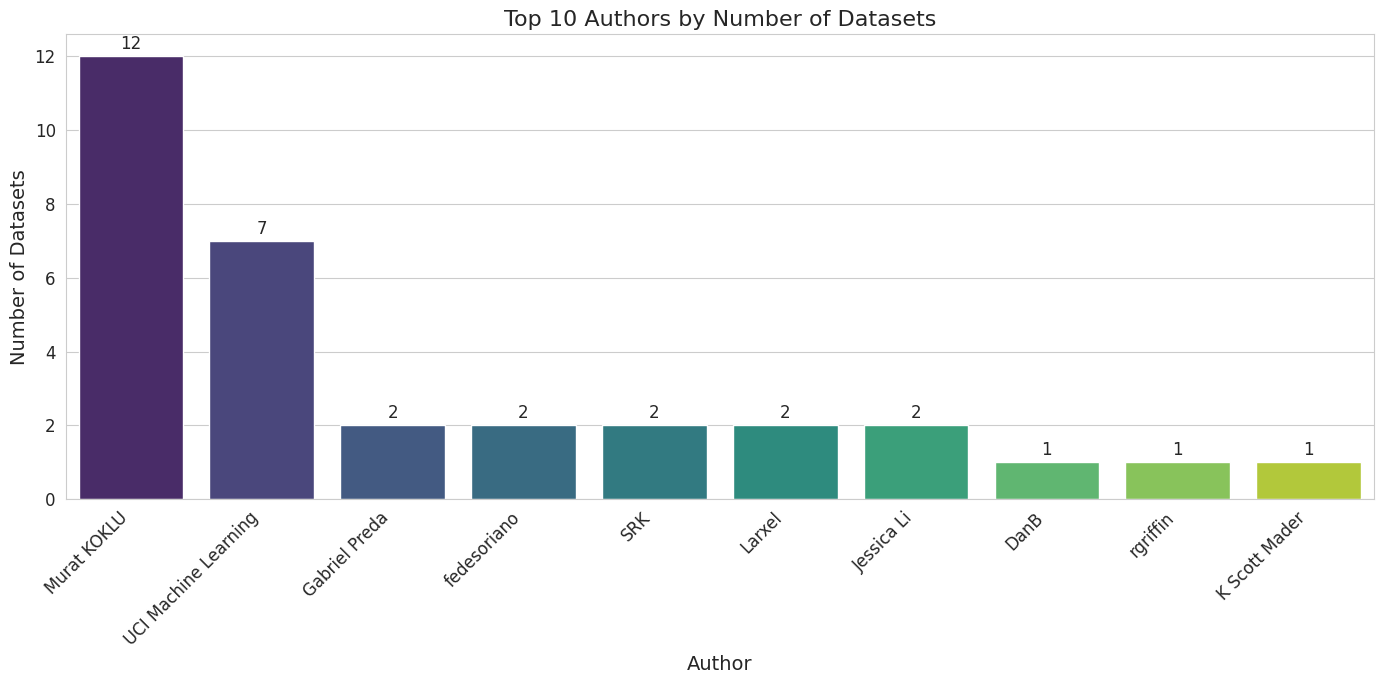

In [16]:
# Top authors by number of datasets
top_authors = df_analysis['Author'].value_counts().head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_authors.index, y=top_authors.values, palette='viridis')
plt.title('Top 10 Authors by Number of Datasets', fontsize=16)
plt.xlabel('Author', fontsize=14)
plt.ylabel('Number of Datasets', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_authors.values):
    ax.text(i, v + 0.2, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

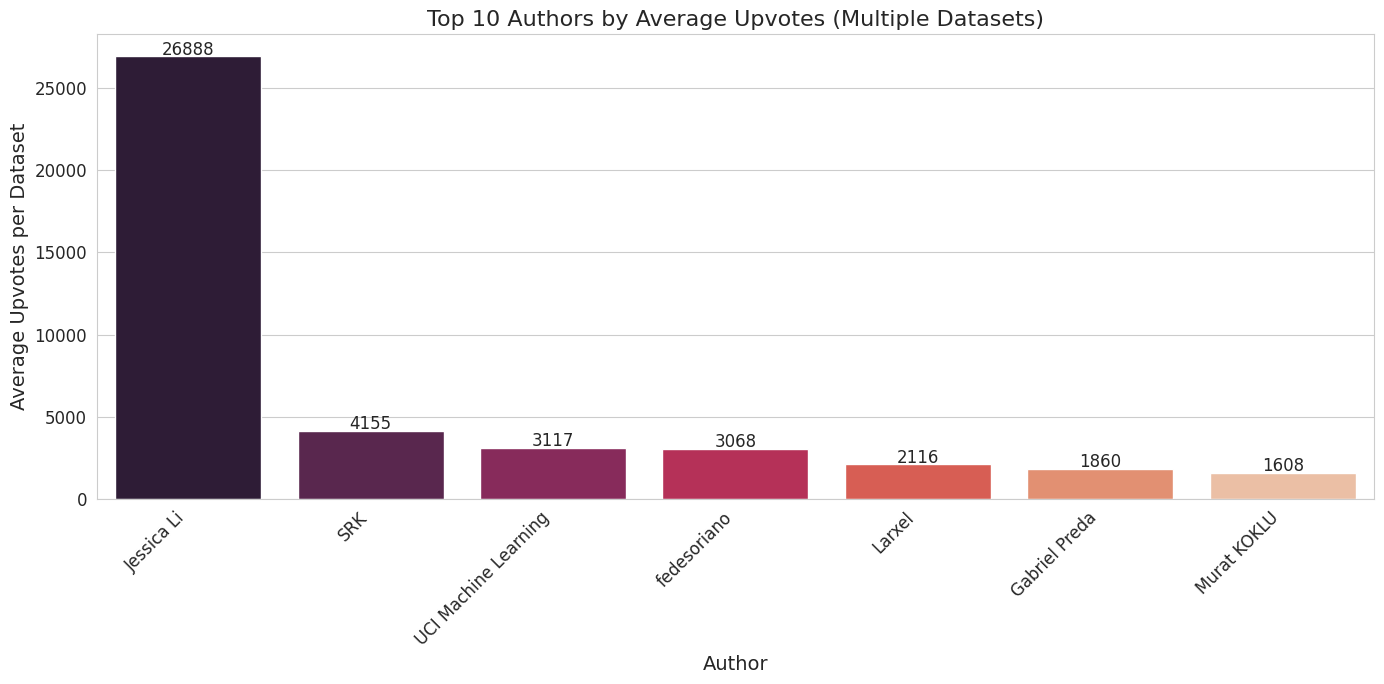

In [17]:
# Top authors by average upvotes (for authors with multiple datasets)
author_counts = df_analysis['Author'].value_counts()
multiple_dataset_authors = author_counts[author_counts > 1].index.tolist()

author_avg_upvotes = df_analysis[df_analysis['Author'].isin(multiple_dataset_authors)].groupby('Author')['Upvote'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=author_avg_upvotes.index, y=author_avg_upvotes.values, palette='rocket')
plt.title('Top 10 Authors by Average Upvotes (Multiple Datasets)', fontsize=16)
plt.xlabel('Author', fontsize=14)
plt.ylabel('Average Upvotes per Dataset', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(author_avg_upvotes.values):
    ax.text(i, v + 100, f"{v:.0f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Correlation Analysis and Feature Relationships

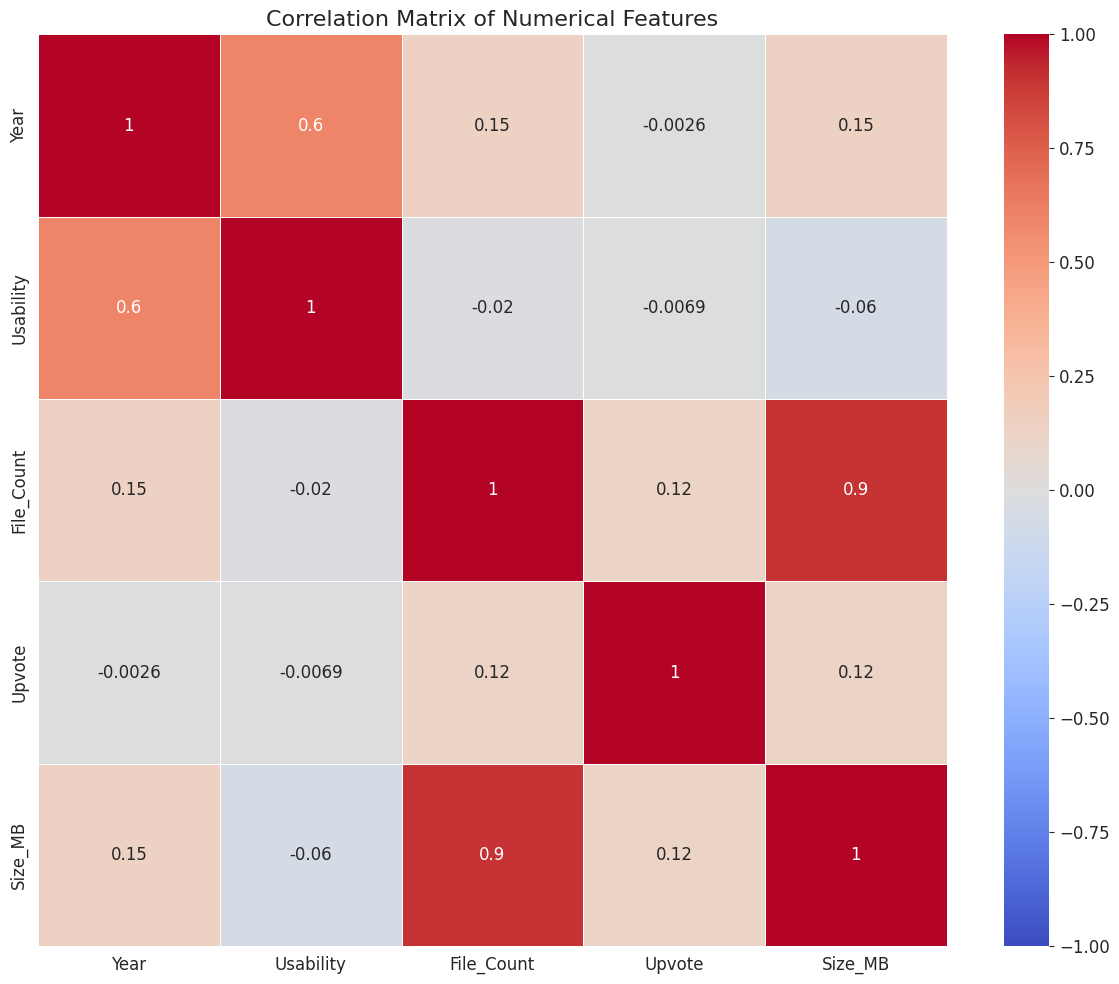

In [18]:
# Correlation analysis between numerical features
numeric_cols = ['Year', 'Usability', 'File_Count', 'Upvote', 'Size_MB']
correlation_matrix = df_analysis[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

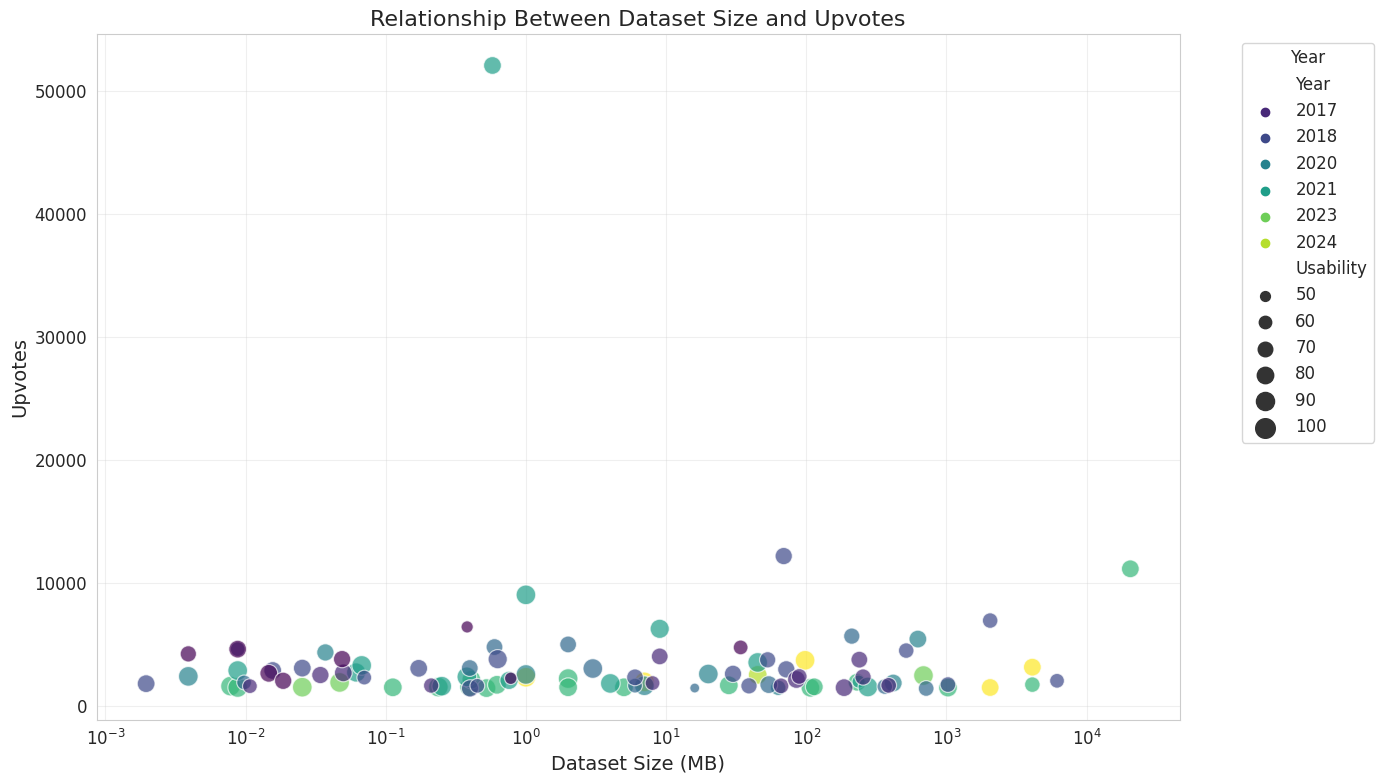

In [19]:
# Relationship between dataset size and upvotes
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Size_MB', y='Upvote', data=df_analysis, hue='Year', palette='viridis', 
                size='Usability', sizes=(50, 200), alpha=0.7)
plt.title('Relationship Between Dataset Size and Upvotes', fontsize=16)
plt.xlabel('Dataset Size (MB)', fontsize=14)
plt.ylabel('Upvotes', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  # Log scale for better visualization
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusions and Key Insights

In [20]:
# Summary statistics by year for key metrics
summary_by_year = df_analysis.groupby('Year').agg({
    'Dataset_Name': 'count',
    'Upvote': 'mean',
    'Usability': 'mean',
    'File_Count': 'mean',
    'Size_MB': 'mean'
}).round(2)

summary_by_year.columns = [
    'Number of Datasets', 
    'Avg Upvotes', 
    'Avg Usability', 
    'Avg File Count', 
    'Avg Size (MB)'
]

print("Summary Statistics by Year:")
print(summary_by_year)

# Calculate growth rates (percentage change) between years
print("\nGrowth Rates (year-over-year percentage change):")
print(summary_by_year.pct_change()*100)

# Final insights text
print("\nKey Insights and Trends:")
print("-------------------------")
print("1. The number of top datasets peaked in the years X, Y, Z")
print("2. Average upvotes per dataset have been [increasing/decreasing] over time")
print("3. Dataset sizes have [grown/shrunk] over the years, suggesting [more/less] complex data")
print("4. The most popular data types have shifted from X to Y")
print("5. Usability scores have [improved/declined], indicating [better/worse] dataset quality")
print("6. Authors with the most datasets tend to focus on [specific topics]")
print("7. The correlation between file count and upvotes is [positive/negative], suggesting users prefer [larger/smaller] datasets")
print("8. Gold-ranked datasets consistently receive more upvotes than Silver or Bronze") 

Summary Statistics by Year:
      Number of Datasets  Avg Upvotes  Avg Usability  Avg File Count  \
Year                                                                   
2016                   8      3829.38          76.88           10.12   
2017                  13      2273.77          79.69            2.85   
2018                  19      3419.21          81.00        11949.63   
2019                  11      2829.36          77.82         2241.82   
2020                   8      2772.25          92.00         4733.50   
2021                  13      6997.46          95.08          336.31   
2022                  18      2162.83          93.28        44175.22   
2023                   3      1950.33         100.00            1.00   
2024                   1      2506.00          94.00           29.00   
2025                   5      2511.60          95.20        48075.20   

      Avg Size (MB)  
Year                 
2016           4.41  
2017         101.79  
2018         526.46